# Procesamiento de imagenes

## Importaciones

In [3]:
from skimage import data, color, img_as_ubyte
import skimage.util as util
import skimage.filters as filters
from skimage.morphology import footprint_rectangle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

## Funciones

In [4]:
def comparar_images(imagen1, imagen2):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
  ax1.imshow(imagen1, cmap='gray')
  ax2.imshow(imagen2, cmap='gray')

In [5]:
def show_histogram(imagen):
  plt.hist(imagen.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
  plt.show()

In [6]:
def comparar_histogramas(imagen1, imagen2, imagen1_name="Imagen 1", imagen2_name="Imagen 2"):
    # Convertir a escala de grises si son RGB
    if len(imagen1.shape) == 3:
        imagen1 = color.rgb2gray(imagen1)
    if len(imagen2.shape) == 3:
        imagen2 = color.rgb2gray(imagen2)

    # Calcular histogramas
    hist1, bins1 = np.histogram(imagen1.flatten(), bins=256, range=[0,1])
    hist2, bins2 = np.histogram(imagen2.flatten(), bins=256, range=[0,1])

    # Graficar imágenes y histogramas
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Mostrar imágenes
    axs[0, 0].imshow(imagen1, cmap="gray")
    axs[0, 0].set_title(imagen1_name)
    axs[0, 0].axis("off")

    axs[0, 1].imshow(imagen2, cmap="gray")
    axs[0, 1].set_title(imagen2_name)
    axs[0, 1].axis("off")

    # Mostrar histogramas
    axs[1, 0].plot(bins1[:-1], hist1, color="black")
    axs[1, 0].set_title(f"Histograma de {imagen1_name}")
    axs[1, 0].set_xlabel("Intensidad")
    axs[1, 0].set_ylabel("Frecuencia")

    axs[1, 1].plot(bins2[:-1], hist2, color="black")
    axs[1, 1].set_title(f"Histograma de {imagen2_name}")
    axs[1, 1].set_xlabel("Intensidad")
    axs[1, 1].set_ylabel("Frecuencia")

    plt.tight_layout()
    plt.show()


## Imagen prueba

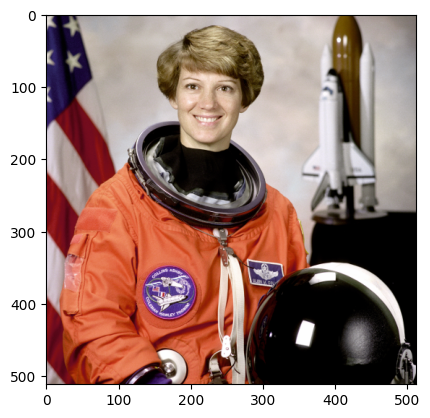

In [7]:
imagen = data.astronaut()
plt.imshow(imagen)
plt.show()

## Acciones con imagenes

### Canales

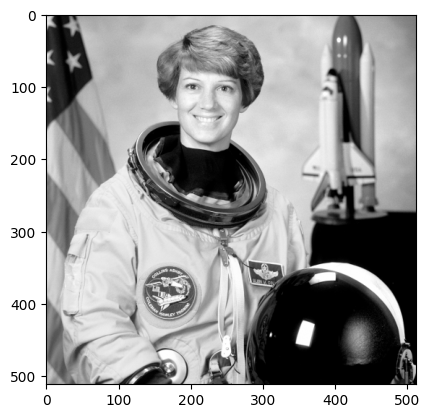

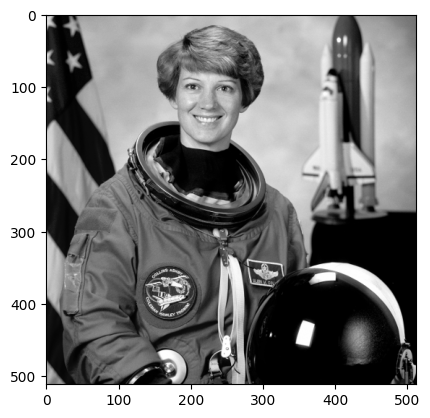

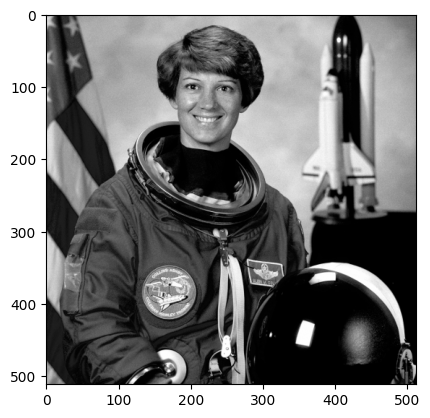

In [8]:
# red
plt.imshow(imagen[:, :, 0], cmap='gray')
plt.show()

# green
plt.imshow(imagen[:, :, 1], cmap='gray')
plt.show()

# blue
plt.imshow(imagen[:, :, 2], cmap='gray')
plt.show()

### Dimensiones de la imagen (alto, ancho, canales)

In [9]:
imagen.shape

(512, 512, 3)

### Niveles de gris

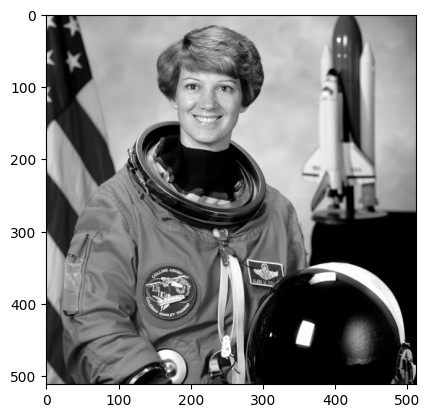

In [10]:
astronauta_gray = color.rgb2gray(imagen)
plt.imshow(astronauta_gray, cmap='gray')

### Flips

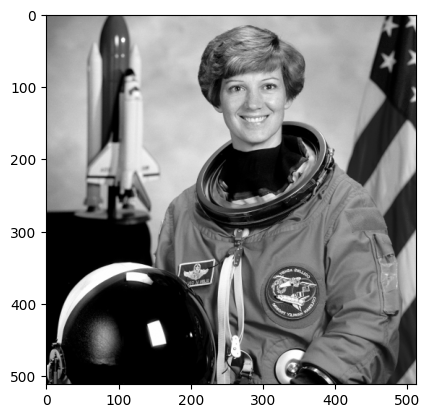

In [11]:
horizontal_flip_astronauta_gray = np.fliplr(astronauta_gray)
plt.imshow(horizontal_flip_astronauta_gray, cmap='gray')

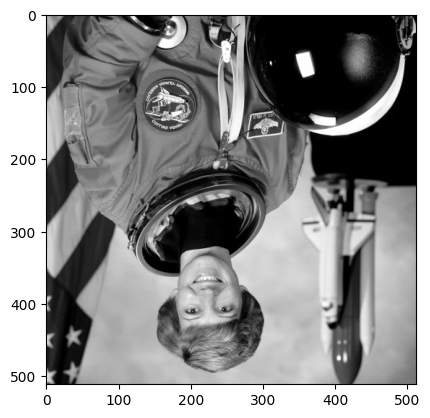

In [12]:
vertical_flip_astronauta_gray = np.flipud(astronauta_gray)
plt.imshow(vertical_flip_astronauta_gray, cmap='gray')

### Ruido - Filtros

#### Gaussian

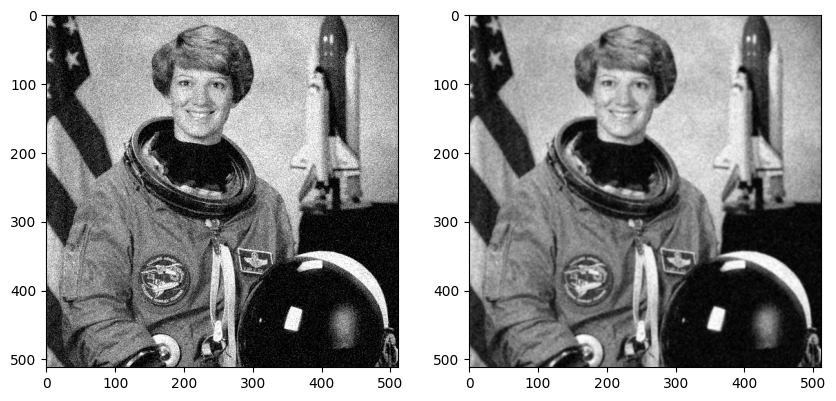

In [13]:
imagen_con_ruido_gaussian = util.random_noise(astronauta_gray, mode='gaussian')

imagen_suavizada_gaussian = filters.gaussian(imagen_con_ruido_gaussian)
comparar_images(imagen_con_ruido_gaussian, imagen_suavizada_gaussian)

#### Sal y pimienta 

Reduccion de ruido con mediana

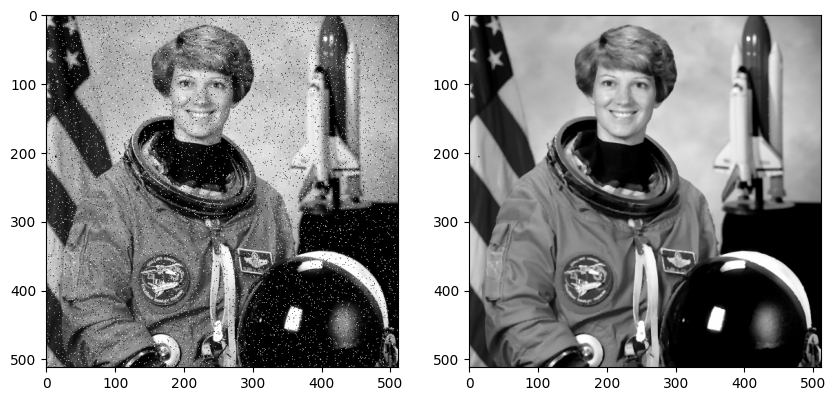

In [14]:
imagen_con_ruido_median = util.random_noise(astronauta_gray, mode='s&p')

imagen_suavizada_median = filters.median(imagen_con_ruido_median)
comparar_images(imagen_con_ruido_median, imagen_suavizada_median)